> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Once you complete this project, remove these **Tip** sections from your report before submission. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: Investigate a Dataset - (No-show appointments)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

> **Tip**: In this section of the report, provide a brief introduction to the dataset you've selected/downloaded for analysis. Read through the description available on the homepage-links present [here](https://docs.google.com/document/d/e/2PACX-1vTlVmknRRnfy_4eTrjw5hYGaiQim5ctr9naaRd4V9du2B5bxpd8FEH3KtDgp8qVekw7Cj1GLk1IXdZi/pub?embedded=True). List all column names in each table, and their significance. In case of multiple tables, describe the relationship between tables. 

> No-show appointments dataset. This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row.‘ScheduledDay’ tells us on what day the patient set up their appointment.‘Neighborhood’ indicates the location of the hospital.‘Scholarship’ indicates whether or not the patient is enrolled in Brasilian welfare program Bolsa Família. Be careful about the encoding of the last column: it says ‘No’ if the patient showed up to their appointment, and ‘Yes’ if they did not show up.


### Question(s) for Analysis
>**Tip**: Clearly state one or more questions that you plan on exploring over the course of the report. You will address these questions in the **data analysis** and **conclusion** sections. Try to build your report around the analysis of at least one dependent variable and three independent variables. If you're not sure what questions to ask, then make sure you familiarize yourself with the dataset, its variables and the dataset context for ideas of what to explore.

**a. Does Gender contribute to the number of patients who show up for an appointment?**

**b.Do most people honour or dishonour the appointment?**

**c. Do receiving an sms affect the patients showing up for an appointment?**

**d. What is the average age of patients?**

**e. Is scholarship a factor towards honouring the appointment?** 

> **Tip**: Once you start coding, use NumPy arrays, Pandas Series, and DataFrames where appropriate rather than Python lists and dictionaries. Also, **use good coding practices**, such as, define and use functions to avoid repetitive code. Use appropriate comments within the code cells, explanation in the mark-down cells, and meaningful variable names. 

In [74]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html


In [4]:
# Upgrade pandas to use dataframe.explode() function. 
!pip install --upgrade pandas==0.25.0

    100% |████████████████████████████████| 10.5MB 2.9MB/s eta 0:00:01  8% |██▋                             | 839kB 22.7MB/s eta 0:00:01    58% |██████████████████▋             | 6.1MB 27.5MB/s eta 0:00:01    70% |██████████████████████▋         | 7.4MB 26.4MB/s eta 0:00:01    83% |██████████████████████████▋     | 8.7MB 25.4MB/s eta 0:00:01
    100% |████████████████████████████████| 13.4MB 2.8MB/s eta 0:00:01   29% |█████████▍                      | 3.9MB 26.4MB/s eta 0:00:01    38% |████████████▌                   | 5.2MB 26.2MB/s eta 0:00:01    57% |██████████████████▍             | 7.7MB 22.0MB/s eta 0:00:01    75% |████████████████████████▎       | 10.2MB 26.0MB/s eta 0:00:01
tensorflow 1.3.0 requires tensorflow-tensorboard<0.2.0,>=0.1.0, which is not installed.
  Found existing installation: numpy 1.12.1
    Uninstalling numpy-1.12.1:
      Successfully uninstalled numpy-1.12.1
  Found existing installation: pandas 0.23.3
    Uninstalling pandas-0.23.3:
      Successfully uninst

In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you **document your data cleaning steps in mark-down cells precisely and justify your cleaning decisions.**


### General Properties
> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

In [76]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df=pd.read_csv('Database_No_show_appointments/noshowappointments-kagglev2-may-2016.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [77]:
df.shape

(110527, 14)

In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [79]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [80]:
df.duplicated().sum()

0

In [81]:
df.nunique()

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64


### Data Cleaning
> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).
 
 **a. Convert all columns head to be in lowercase and replace -(hyphen) with _ (underscore)**
 
 **b. Converting scheduledday and AppointmentDay to date data type**
 
 **c. Drop appointment ID Column**
 
 **d. Cleaning negative age patient.**
 

In [82]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.

In [83]:
#Convert all columns head to be in lowercase and replace -(hyphen) with _ (underscore)
df.rename(columns=lambda x:x.replace("-","_").lower(), inplace=True) 
df.head()

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [84]:
#Converting scheduledday and AppointmentDay to date data type
df['scheduledday'] = pd.to_datetime(df['scheduledday'])

In [85]:
df['appointmentday'] = pd.to_datetime(df['appointmentday'])

In [86]:
df.dtypes

patientid                float64
appointmentid              int64
gender                    object
scheduledday      datetime64[ns]
appointmentday    datetime64[ns]
age                        int64
neighbourhood             object
scholarship                int64
hipertension               int64
diabetes                   int64
alcoholism                 int64
handcap                    int64
sms_received               int64
no_show                   object
dtype: object

In [87]:
#Dropping appointment ID column
df.head()
df.drop('appointmentid', axis=1, inplace=True)
df.head()

,patientid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show
0,2.987250e+13,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,F,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,F,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [88]:
#Check the negative age
negative_age=df.query('age < 0')
negative_age

,patientid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show
99832,4.659432e+14,F,2016-06-06 08:58:13,2016-06-06,-1,ROMÃO,0,0,0,0,0,0,No


In [89]:
#Drop the negative age 
df.drop(negative_age.index, inplace = True)
negative_age

,patientid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show
99832,4.659432e+14,F,2016-06-06 08:58:13,2016-06-06,-1,ROMÃO,0,0,0,0,0,0,No


<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. **Compute statistics** and **create visualizations** with the goal of addressing the research questions that you posed in the Introduction section. You should compute the relevant statistics throughout the analysis when an inference is made about the data. Note that at least two or more kinds of plots should be created as part of the exploration, and you must  compare and show trends in the varied visualizations. 



> **Tip**: - Investigate the stated question(s) from multiple angles. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables. You should explore at least three variables in relation to the primary question. This can be an exploratory relationship between three variables of interest, or looking at how two independent variables relate to a single dependent variable of interest. Lastly, you  should perform both single-variable (1d) and multiple-variable (2d) explorations.


### Research Question 1 (Does Gender contribute to the number of patients who show up for an appointment?)

gender
F    71839
M    38687
Name: gender, dtype: int64


Text(0,0.5,'Total Number of patients')

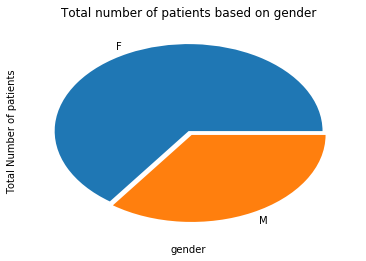

In [90]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.
#Total number of patient per gender
print(df.groupby('gender').gender.count())
df.groupby('gender').size().plot(kind="pie",explode=(0,0.05))
plt.title('Total number of patients based on gender')
plt.xlabel('gender')
plt.ylabel('Total Number of patients')

In general the total number of patients from this dataset are female inclusive of those who attended and those who missed the appointmnet. 

In [111]:
#Note: The no_show column says ‘No’ if the patient showed up to their appointment, and ‘Yes’ if they did not show up.
#Checking the number of patients who showed up and who did not show up for the appointment based on gender. 
df_noshow = df.query('no_show == "Yes"').groupby('gender')['no_show'].count()
df_show = df.query('no_show == "No"').groupby('gender')['no_show'].count()
print(df_noshow)
print(df_show)#


gender
F    14594
M     7725
Name: no_show, dtype: int64
gender
F    57245
M    30962
Name: no_show, dtype: int64


Text(0,0.5,'patients ')

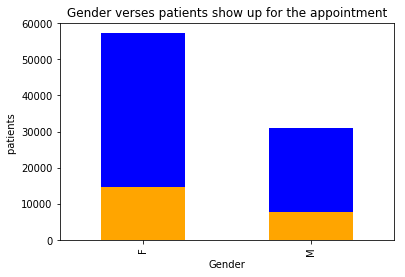

In [114]:
df_show.plot(kind='bar', color='blue')
df_noshow.plot(kind='bar', color='orange')
plt.title('Gender verses patients show up for the appointment')
plt.xlabel('Gender')
plt.ylabel('patients ')

Most patients who showed up for the appointment are female. 

### Research Question 2  (Do most people honour or dishonour the appointment?)

In [93]:
df_no_show= df['no_show'].value_counts()
df_no_show

No     88207
Yes    22319
Name: no_show, dtype: int64

Text(0.5,1,'Attendance vs missed appointment')

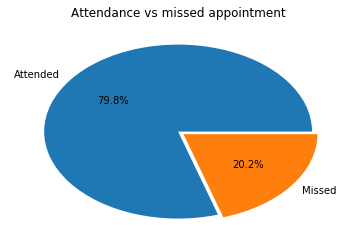

In [94]:
plt.pie(df_no_show, labels=['Attended','Missed'],explode=(0,0.05),autopct=('%1.1f%%'))
plt.title('Attendance vs missed appointment')

From the above  visualization, we can conclude that most patients showed up for the appointment. 

#### A function to implement unstacked counts of independent (x) and dependent data (y)

In [105]:
# data refers to the dataframe you are considering
# x is your independent data
# y is the dependent data
# unstacked_count is the variable for the counts of the dependent data grouped per unique values of the independent data
def unstack_fun(data,x,y):
    unstacked_count = data.groupby([x,y])[y].count().unstack()
    return unstacked_count

### Research Question 3 (Do receiving an sms affect the patients showing up for an appointment?)

In [96]:
# Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions to
#   investigate.
df_sms= unstack_fun(df, 'no_show', 'sms_received')
df_sms

sms_received,0,1
no_show,,
No,62509,25698
Yes,12535,9784


Text(0,0.5,'Number of patients')

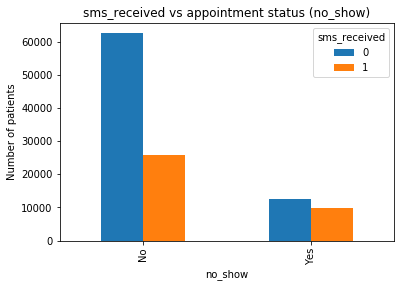

In [97]:
df_sms.plot(kind='bar')
plt.title('sms_received vs appointment status (no_show)')
plt.xlabel('no_show')
plt.ylabel('Number of patients')

The number of sms does not affect the number of people who show up for an apointment. From this statistics majority of patients who show up for an appointment have not received an sms.

In [98]:
#Applying the function(unstack_fun) 
df_scholarship=unstack_fun(df,'no_show','scholarship')
df_scholarship

scholarship,0,1
no_show,,
No,79924,8283
Yes,19741,2578


Text(0,0.5,'Total number of patients')

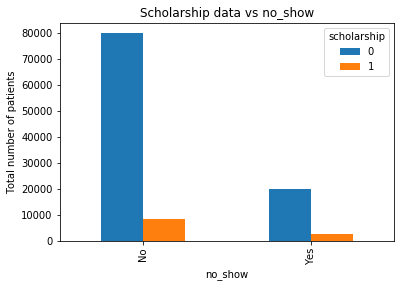

In [99]:
df_scholarship.plot(kind='bar')
plt.title('Scholarship data vs no_show')
plt.xlabel('no_show')
plt.ylabel('Total number of patients')

The number of patients who show up for an appointment is not dependent on the scholarship. From the graph, most patients with no scholarship still show up for the appointment. 

 ### Research Question 4: What is the average age of patients?What age bracket do most patients fall?

In [100]:
#Check the average age of patients
df.age.describe()

count    110526.000000
mean         37.089219
std          23.110026
min           0.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         115.000000
Name: age, dtype: float64

In [101]:
#Total number of patients below the average age
df.query('age < 37').age.count()

54583

In [102]:
#Total number of patients above the average age
df.query('age > 37').age.count()

54410

Text(0.5,1,'Total number of patients vs Age')

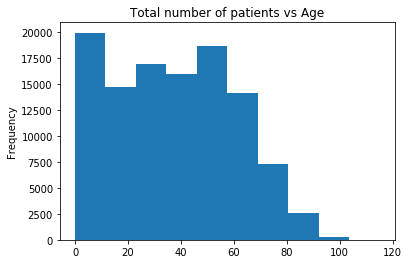

In [103]:
#Checking the age bracket where most patients fall
df.age.plot(kind='hist')
plt.title('Total number of patients vs Age')


From the above visualization we can conclude that most patients age is 0 years. From age 60 the number of patients start reducing. 

<a id='conclusions'></a>
## Conclusions

> **Tip**: Finally, summarize your findings and the results that have been performed in relation to the question(s) provided at the beginning of the analysis. Summarize the results accurately, and point out where additional research can be done or where additional information could be useful.

> **Tip**: Make sure that you are clear with regards to the limitations of your exploration. You should have at least 1 limitation explained clearly. 

> **Tip**: If you haven't done any statistical tests, do not imply any statistical conclusions. And make sure you avoid implying causation from correlation!

> **Tip**: Once you are satisfied with your work here, check over your report to make sure that it is satisfies all the areas of the rubric (found on the project submission page at the end of the lesson). You should also probably remove all of the "Tips" like this one so that the presentation is as polished as possible.


### Conclusions from investigating the No show appointment dataset

***1. The total number of female patients is more. The total number of patients who show up for the appointment based on gender is female. The total number of patients who do not show up for an appointment based on gender is female.***

***2. Most patients are at 0 years. The age starts depreciating from 60 years of age. The average age of the patients is 37 years.***

***3. Most patients honoured their appointment henced show up for the appointment.***

***4. There is no relationship between the sms received and the number of patients who show up for an appointment. Most of the people who do not receive the notification still show up for the appointment.***

***5. Scholarship has no effect on the number of patients who honour an appointment. Most people who show up for the appointment have not recieved a scholarship.*** 

**Limitation**

Had some difficulty comparing the neighbourhood with no_show appointment. There are many neighbourhoods. 


## Submitting your Project 

> **Tip**: Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> **Tip**: Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> **Tip**: Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [104]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0